In [2]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 22.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc
)

In [6]:
df = pd.read_csv("fake review cleaned.csv")
df = df.drop(['Unnamed: 0'], axis=1)
df = df.dropna(subset=['cleaned_text'])

## TF-LDF Vectorizer

## MNB 

In [7]:
X = df['cleaned_text']
y = df.label.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)
mnb = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('mnb',MultinomialNB(alpha=1))])
mnb.fit(X_train,y_train)
pred = mnb.predict(X_test)

In [9]:
# probability = model.predict_proba(x_test)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, pred))
print("Root Mean Squared Error: ", round(np.sqrt(mean_squared_error(y_test, pred))) )
mnb_roc_auc = roc_auc_score(y_test, pred)
print("\nROC AUC: ")
print(mnb_roc_auc)

Accuracy: 0.8743662668480277
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4069
           1       0.84      0.93      0.88      4018

    accuracy                           0.87      8087
   macro avg       0.88      0.87      0.87      8087
weighted avg       0.88      0.87      0.87      8087

Root Mean Squared Error:  0

ROC AUC: 
0.8746888082028512


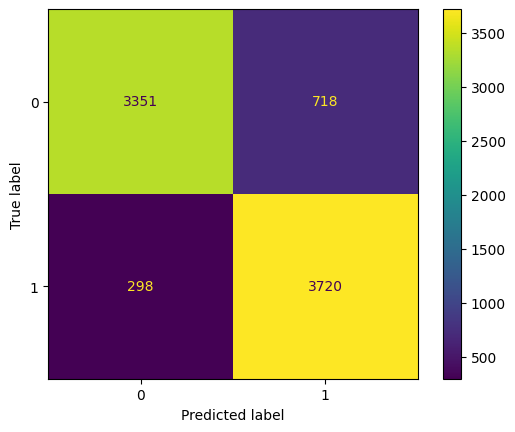

In [10]:
# confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## Random Forest

In [11]:
rfc = Pipeline(steps=[('pre_processing',TfidfVectorizer(lowercase=False)),('random forest',RandomForestClassifier(n_estimators = 100, random_state=42))])
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print("Random Forest Classifier")
print("Accuracy:",accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)
rfc_roc_auc = roc_auc_score(y_test, pred)
print("\nROC AUC: ")
print(rfc_roc_auc)

Random Forest Classifier
Accuracy: 0.8850006182762459
              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4069
           1       0.87      0.91      0.89      4018

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.88      8087
weighted avg       0.89      0.89      0.88      8087


ROC AUC: 
0.8851395373559214


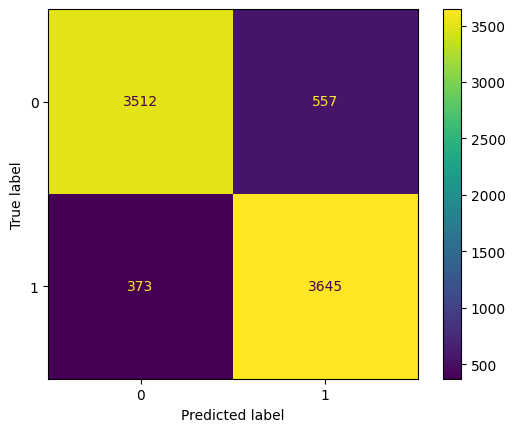

In [12]:
# confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

## Count2Vec

In [13]:
model = Word2Vec(df['tokenized'], vector_size=100, window=5, min_count=1, sg=0, workers=4)

In [14]:
def vectorize_text(text, model):
    # Average the word vectors for the words in the text
    vector = [model.wv[word] for word in text if word in model.wv]
    if vector:
        return sum(vector) / len(vector)
    else:
        return [0.0] * model.vector_size

df['text_vectors'] = df['tokenized'].apply(lambda x: vectorize_text(x, model))

In [15]:
# Ensure consistent dimensions for word vectors
max_dimensions = max(len(vector) for vector in df['text_vectors'])

for i in range(max_dimensions):
    df[f'dimension_{i}'] = df['text_vectors'].apply(lambda vector: vector[i] if i < len(vector) else 0.0)

/var/folders/r5/pzyqwyjx0dx2t_4tzqgy58c40000gn/T/ipykernel_33064/3727857230.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'dimension_{i}'] = df['text_vectors'].apply(lambda vector: vector[i] if i < len(vector) else 0.0)
/var/folders/r5/pzyqwyjx0dx2t_4tzqgy58c40000gn/T/ipykernel_33064/3727857230.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'dimension_{i}'] = df['text_vectors'].apply(lambda vector: vector[i] if i < len(vector) else 0.0)
/var/folders/r5/pzyqwyjx0dx2t_4tzqgy58c40000gn/T/ipykernel_33064/372785723

# random forest

In [16]:
X = df.drop('label', axis=1)  # Features
y = df['label']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Choose which variables to use

# List of columns to drop
columns_to_drop = ['category', 'rate', 'tokenized', 'text_vectors','text_','cleaned_text']

# Drop the selected columns
Xrf = X_train.drop(columns=columns_to_drop, axis=1)
yrf = y_train

Xrf_test = X_test.drop(columns=columns_to_drop, axis=1)

In [18]:
rfc_c2v = RandomForestClassifier(n_estimators = 100, random_state=42)
rfc_c2v.fit(Xrf,yrf)
pred = rfc_c2v.predict(Xrf_test)
print("Random Forest Classifier")
print("acc:",accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)
rfc_c2v_roc_auc = roc_auc_score(y_test, pred)
print("\nROC AUC: ")
print(rfc_c2v_roc_auc)

Random Forest Classifier
acc: 0.8141461605045134
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      4069
           1       0.81      0.82      0.81      4018

    accuracy                           0.81      8087
   macro avg       0.81      0.81      0.81      8087
weighted avg       0.81      0.81      0.81      8087


ROC AUC: 
0.8141956978800607


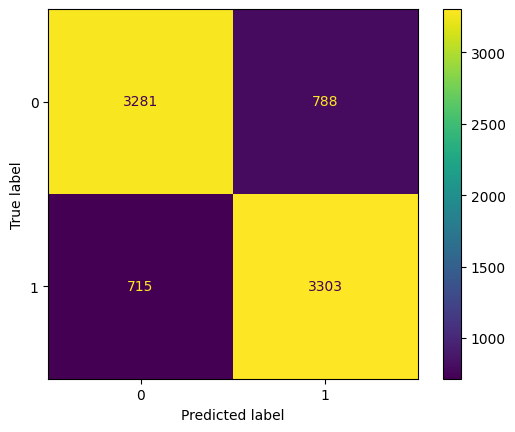

In [19]:
# confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

# GBC

In [20]:
# Choose which variables to use

# List of columns to drop
columns_to_drop = ['category', 'rate', 'tokenized', 'text_vectors','text_','cleaned_text']

# Drop the selected columns
XGB = X_train.drop(columns=columns_to_drop, axis=1)
yGB = y_train

XGB_test = X_test.drop(columns=columns_to_drop, axis=1)

In [21]:
gbc_c2v = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc_c2v.fit(XGB, yGB)
pred = gbc_c2v.predict(XGB_test)

In [23]:
print("Gradient Boosting Classifier")
print("acc:",accuracy_score(y_test,pred))
print(classification_report(y_test, pred))
confusion_matrix(y_test, pred)
gbc_c2v_roc_auc = roc_auc_score(y_test, pred)
print("\nROC AUC: ")
print(gbc_c2v_roc_auc)

Gradient Boosting Classifier
acc: 0.8125386422653642
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4069
           1       0.81      0.82      0.81      4018

    accuracy                           0.81      8087
   macro avg       0.81      0.81      0.81      8087
weighted avg       0.81      0.81      0.81      8087


ROC AUC: 
0.8125904552639199


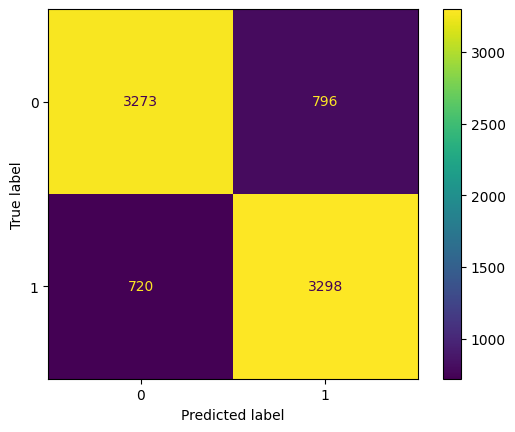

In [24]:
# confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In [26]:


# Assuming that 'mnb' is your trained Multinomial Naive Bayes model
import joblib

# Save the trained model using joblib
joblib.dump(mnb, 'mnb_model.joblib')
# Save the vectorizer using joblib
joblib.dump(mnb.named_steps['pre_processing'], 'vectorizer.joblib')


['vectorizer.joblib']

# Define your models
models = [
    {'label': 'Multinomial Naive Bayes TF-LDF', 'model': mnb},
    {'label': 'Random Forest Classifier TF-LDF', 'model': rfc},
    {'label': 'Random Forest Classifier C2V', 'model': rfc_c2v},
    {'label': 'Gradient Boosting Classifier', 'model': gbc_c2v}
]

# Initialize lists to store model labels, false positive rates, true positive rates, and AUC scores
model_labels = []
model_fpr = []
model_tpr = []
model_auc = []

for m in models:
    model = m['model']  # select the model
    y_pred_proba = model.predict_proba(XGB_test)[:, 1]  # Predict probabilities for the positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_s = roc_auc_score(y_test, y_pred_proba)
    
    # Store data for each model
    model_labels.append('%s (AUC = %0.2f)' % (m['label'], auc_s))
    model_fpr.append(fpr)
    model_tpr.append(tpr)
    model_auc.append(auc_s)

# Plot ROC curves for both models
plt.figure(figsize=[8, 6])

for label, fpr, tpr in zip(model_labels, model_fpr, model_tpr):
    plt.plot(fpr, tpr, label=label)

# Add the 45-degree line
plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiple Models')
plt.legend(loc="lower right")
plt.show()